In [1]:
import numpy as np
import pandas as pd
from glob import glob
import json
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

In [5]:
task = "mmlu_cais_diff"
metric = "likelihood_diff,none"

In [ ]:
files = glob(f"results/{task}/*/*iter*/*.json")

df = {}
for f in files:
    data = json.load(open(f))
    metric_value = data["results"][task][metric]
    arc = f.split("/")[3].split("__")[-2]
    ckpt = int(f.split("/")[2].split("_")[-1])

    # check if arc already in df
    if arc not in df:
        df[arc] = {}
    df[arc][ckpt] = metric_value


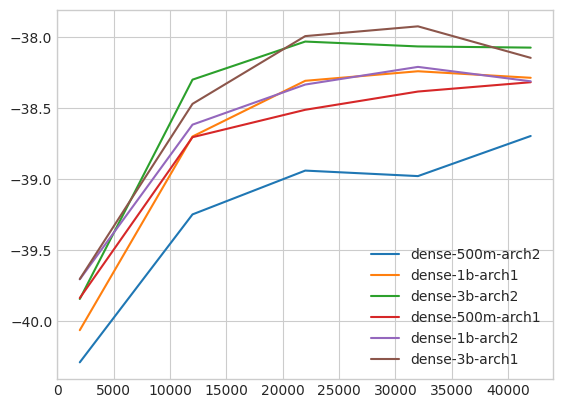

In [13]:
for arc in df:
    x = list(df[arc].keys())
    x = sorted(x)
    y = [df[arc][i] for i in x]
    plt.plot(x, y, label=arc)
plt.legend()